In [15]:
import pandas as pd
import geopandas as gpd

In [16]:
tracts = gpd.read_file("../data/tracts/tl_2022_23_tract_with_nodes.shp.zip")

In [18]:
conserved_lands = gpd.read_file("../data/conserved_lands/Maine_Conserved_Lands_with_nodes.shp.zip")

In [19]:
df = pd.read_csv("../data/walk_times/walk_times_tract_df.csv", index_col=0)
df.columns

Index(['tract_osmid', 'land_osmid', 'trip_time'], dtype='object')

In [20]:
df_with_lands = df.merge(conserved_lands.drop(columns="geometry"), how="left", left_on="land_osmid", right_on="osmid")
df_with_lands.head(1)

,tract_osmid,land_osmid,trip_time,OBJECTID,PROJECT,PARCEL_NAM,DESIGNATIO,CONS1_TYPE,HOLD1_NAME,HOLD1_TYPE,...,IFW_ID,LMF_ID,DEPT_ID,NOTE_,GAP_STATUS,IUCN_STATU,CL_UNIQUEI,TAX_MAP_TO,TAX_MAP_BO,osmid
0,8040981688,7932020155,60,1768,Grand Lake Stream,Big Falls,State Wildlife Management Area,Fee,Maine Department of Inland Fisheries and Wildlife,State,...,0655004,20203000,NaN,Digitized from COGO using deed and by snapping...,2-Permanent Protection to Maintain a Primarily...,NaN,5361,Greenlaw Chopping Twp,NaN,7932020155


In [22]:
merge = gpd.GeoDataFrame(tracts.merge(df_with_lands, how="outer", left_on="osmid", right_on="tract_osmid"))
merge.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'osmid_x',
       'geometry', 'tract_osmid', 'land_osmid', 'trip_time', 'OBJECTID',
       'PROJECT', 'PARCEL_NAM', 'DESIGNATIO', 'CONS1_TYPE', 'HOLD1_NAME',
       'HOLD1_TYPE', 'CONS2_TYPE', 'HOLD2_NAME', 'HOLD2_TYPE', 'ECO_RESERV',
       'ACQ_YEAR', 'ACQ_DATE', 'RPT_AC', 'CALC_AC', 'PUB_ACCESS', 'PURPOSE1',
       'PURPOSE2', 'BPL_ID', 'IFW_ID', 'LMF_ID', 'DEPT_ID', 'NOTE_',
       'GAP_STATUS', 'IUCN_STATU', 'CL_UNIQUEI', 'TAX_MAP_TO', 'TAX_MAP_BO',
       'osmid_y'],
      dtype='object')

In [23]:
merge.to_file("../data/joins/tracts_with_lands.shp.zip")

/tmp/ipykernel_5331/2129301777.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merge.to_file("../data/joins/tracts_with_lands.shp.zip")


In [24]:
dissolve = merge.dissolve("GEOID", "sum")

/home/philip/miniconda3/envs/ox/lib/python3.11/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


Text(0.5, 1.0, 'Acres of Conserved Land within 60 Minute Walk of Tract Center')

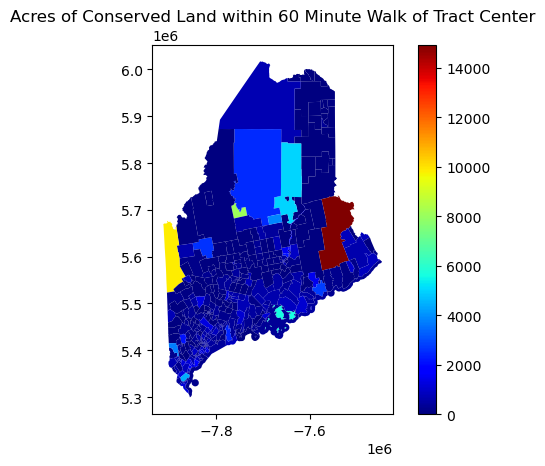

In [25]:
ax = dissolve.plot("CALC_AC", cmap="jet", legend=True)
ax.set_title("Acres of Conserved Land within 60 Minute Walk of Tract Center")

In [26]:
dissolve.to_file("../data/joins/tracts_dissolve.shp.zip")

/tmp/ipykernel_5331/205006466.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  dissolve.to_file("../data/joins/tracts_with_lands_sum.shp.zip")
